In [105]:
# importing  packages

import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

import tensorflow as tf

from sklearn.model_selection import train_test_split

## Data Preprocessing

In [106]:
df = pd.read_csv('interactions.tsv', sep = '\t')
df

,gene_name,gene_claim_name,entrez_id,interaction_claim_source,interaction_types,drug_claim_name,drug_claim_primary_name,drug_name,drug_concept_id,interaction_group_score,PMIDs
0,CDK7,CDK7,1022.0,CancerCommons,inhibitor,SNS-032,SNS-032,BMS-387032,chembl:CHEMBL296468,0.82,NaN
1,VDR,VDR,7421.0,DTC,NaN,NIFEKALANT,NIFEKALANT,NIFEKALANT,chembl:CHEMBL360861,0.14,NaN
2,GPR55,GPR55,9290.0,DTC,NaN,BISACODYL,BISACODYL,BISACODYL,chembl:CHEMBL942,0.94,NaN
3,NR1H4,NR1H4,9971.0,DTC,NaN,PENTACHLOROPHENOL,PENTACHLOROPHENOL,PENTACHLOROPHENOL,chembl:CHEMBL75967,0.07,NaN
4,FGFR2,FGFR2,2263.0,JAX-CKB,NaN,AZ6089,AZ6089,NaN,NaN,NaN,22869148
...,...,...,...,...,...,...,...,...,...,...,...
85455,PIK3C3,PIK3C3,5289.0,MyCancerGenome,inhibitor,BGJ398,BGJ398,INFIGRATINIB,chembl:CHEMBL1852688,0.17,NaN
85456,ABL1,Tyrosine-protein kinase ABL1,25.0,TTD,NaN,Azaindole derivative 2,Azaindole derivative 2,NaN,NaN,NaN,NaN
85457,CACNA1D,776,776.0,GuideToPharmacology,inhibitor,135651166,[3H](+)-ISRADIPINE,NaN,NaN,NaN,NaN
85458,PRKCA,PRKCA,5578.0,DTC,NaN,RESVERATROL,RESVERATROL,RESVERATROL,chembl:CHEMBL165,0.12,21880495


In [107]:
#Selectionner les colonnes qui nous interessent
newDF = df[['gene_name','drug_name','interaction_group_score']]
newDF

,gene_name,drug_name,interaction_group_score
0,CDK7,BMS-387032,0.82
1,VDR,NIFEKALANT,0.14
2,GPR55,BISACODYL,0.94
3,NR1H4,PENTACHLOROPHENOL,0.07
4,FGFR2,NaN,NaN
...,...,...,...
85455,PIK3C3,INFIGRATINIB,0.17
85456,ABL1,NaN,NaN
85457,CACNA1D,NaN,NaN
85458,PRKCA,RESVERATROL,0.12


In [108]:
# Count number of missing values
newDF['gene_name'].isnull().sum()

3124

In [109]:
#Drop missing values
dataframe = newDF.dropna()
dataframe

,gene_name,drug_name,interaction_group_score
0,CDK7,BMS-387032,0.82
1,VDR,NIFEKALANT,0.14
2,GPR55,BISACODYL,0.94
3,NR1H4,PENTACHLOROPHENOL,0.07
5,APOE,PREDNISONE,0.23
...,...,...,...
85449,CSF1R,CHEMBL541400,0.03
85452,CDK8,CHEMBL546797,0.09
85455,PIK3C3,INFIGRATINIB,0.17
85458,PRKCA,RESVERATROL,0.12


In [110]:
dataframe['drug_name'].isnull().sum()


0

In [111]:
dataframe['gene_name'].isnull().sum()

0

In [112]:
dataframe['interaction_group_score'].isnull().sum()

0

In [113]:
dataframe.sort_values('gene_name')

,gene_name,drug_name,interaction_group_score
84253,A2M,THROMBIN,5.30
19794,AAK1,BARICITINIB,7.96
46335,AANAT,FLUOXETINE,1.41
50157,AANAT,MELATONIN,3.14
47878,AANAT,ISOPROTERENOL,1.46
...,...,...,...
70908,ZNF565,METHYLPHENIDATE,2.83
58879,ZNF804A,LITHIUM,2.77
15107,ZSCAN25,LOPINAVIR,2.36
78255,ZSCAN25,TACROLIMUS,1.87


In [114]:
G = nx.from_pandas_edgelist(dataframe[:30], source='gene_name', target='drug_name',edge_attr= 'interaction_group_score')

In [115]:
# Give the graph a name
G.name = 'Drug Interactions Network'

# Obtain general information of graph
print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

Graph named 'Drug Interactions Network' with 60 nodes and 30 edges
Network density: 0.01694915254237288


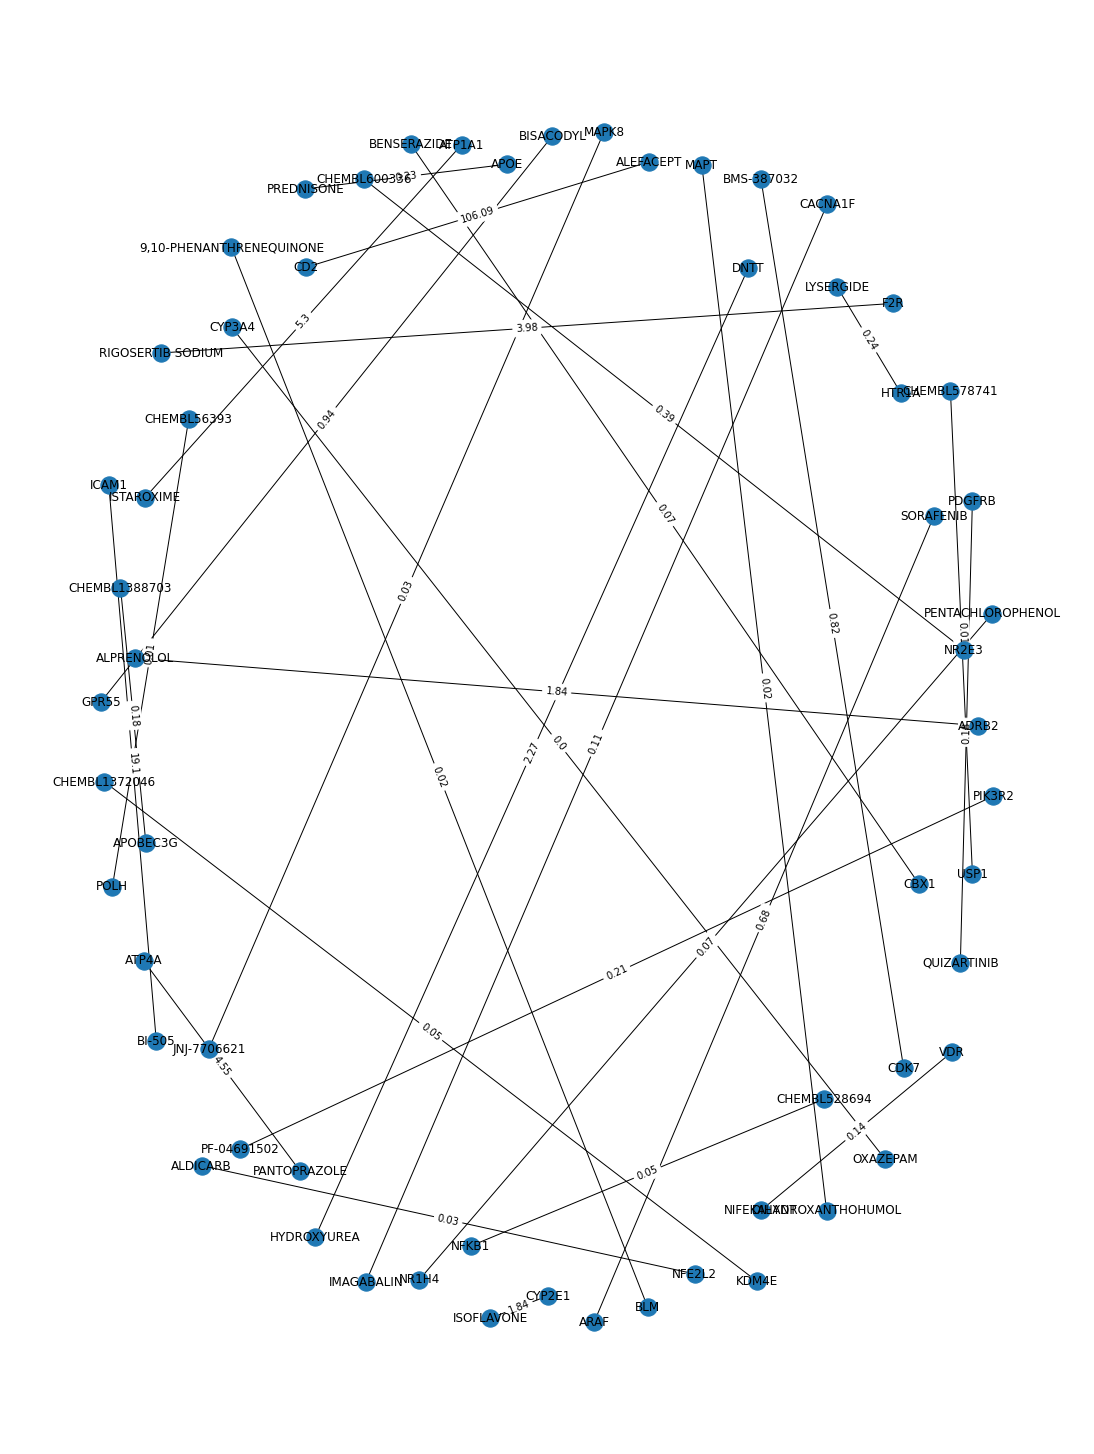

In [116]:
figure(figsize=(15, 20))
pos = nx.spring_layout(G, k=10)  # For better example looking
nx.draw(G, pos, with_labels=True)
labels = {e: G.edges[e]['interaction_group_score'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [117]:
Newdf2 = pd.read_csv('gene_disease_associations.tsv', sep = '\t')

In [118]:
Newdf2

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,109580095,HBB-LCR,0.743,0.115,C0002875,Cooley's anemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84034,109580095,HBB-LCR,0.743,0.115,C0005283,beta Thalassemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84035,109580095,HBB-LCR,0.743,0.115,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84036,109580095,HBB-LCR,0.743,0.115,C0085578,Thalassemia Minor,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human


In [119]:
newDF2 = Newdf2[['geneSymbol','diseaseName','score']]
newDF2

,geneSymbol,diseaseName,score
0,A1BG,Hepatomegaly,0.30
1,A1BG,Schizophrenia,0.30
2,A2M,Alzheimer's Disease,0.50
3,A2M,Malignant tumor of colon,0.31
4,A2M,Colonic Neoplasms,0.30
...,...,...,...
84033,HBB-LCR,Cooley's anemia,0.30
84034,HBB-LCR,beta Thalassemia,0.30
84035,HBB-LCR,Hemoglobin F Disease,0.30
84036,HBB-LCR,Thalassemia Minor,0.30


In [120]:
newDF2['geneSymbol'].isnull().sum()

0

In [121]:
dataf = newDF2.dropna()
dataf

,geneSymbol,diseaseName,score
0,A1BG,Hepatomegaly,0.30
1,A1BG,Schizophrenia,0.30
2,A2M,Alzheimer's Disease,0.50
3,A2M,Malignant tumor of colon,0.31
4,A2M,Colonic Neoplasms,0.30
...,...,...,...
84033,HBB-LCR,Cooley's anemia,0.30
84034,HBB-LCR,beta Thalassemia,0.30
84035,HBB-LCR,Hemoglobin F Disease,0.30
84036,HBB-LCR,Thalassemia Minor,0.30


In [122]:
dataf.sort_values('geneSymbol')

,geneSymbol,diseaseName,score
0,A1BG,Hepatomegaly,0.30
1,A1BG,Schizophrenia,0.30
27,A2M,alpha-2-Macroglobulin Deficiency,0.31
26,A2M,Acute kidney injury,0.30
25,A2M,Liver carcinoma,0.51
...,...,...,...
80925,ZSWIM9,Sclerocystic Ovaries,0.30
59639,ZW10,Osteosarcoma,0.31
71089,ZWILCH,Weight Gain,0.30
64420,ZWINT,Liver carcinoma,0.31


In [123]:
G = nx.from_pandas_edgelist(dataf, source='geneSymbol', target='diseaseName',edge_attr= 'score')

In [124]:
# Give the graph a name
G.name = 'Disease Interactions Network'

# Obtain general information of graph
print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

Graph named 'Disease Interactions Network' with 20884 nodes and 84038 edges
Network density: 0.00038538883692007997


In [125]:
#figure(figsize=(15, 20))
#pos = nx.spring_layout(G, k=10)  # For better example looking
#nx.draw(G, pos, with_labels=True)
#labels = {e: G.edges[e]['score'] for e in G.edges}
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#plt.show()

In [126]:
dataf.rename(columns = {'geneSymbol':'gene_name'}, inplace = True)
dataf

,gene_name,diseaseName,score
0,A1BG,Hepatomegaly,0.30
1,A1BG,Schizophrenia,0.30
2,A2M,Alzheimer's Disease,0.50
3,A2M,Malignant tumor of colon,0.31
4,A2M,Colonic Neoplasms,0.30
...,...,...,...
84033,HBB-LCR,Cooley's anemia,0.30
84034,HBB-LCR,beta Thalassemia,0.30
84035,HBB-LCR,Hemoglobin F Disease,0.30
84036,HBB-LCR,Thalassemia Minor,0.30


In [127]:
#Merging the two dataset to get the final one that we'll be using next
Finaldf=pd.merge(dataframe, dataf, on = "gene_name")
Finaldf

,gene_name,drug_name,interaction_group_score,diseaseName,score
0,VDR,NIFEKALANT,0.14,"Osteoporosis, Age-Related",0.30
1,VDR,NIFEKALANT,0.14,Alopecia,0.50
2,VDR,NIFEKALANT,0.14,Bipolar Disorder,0.31
3,VDR,NIFEKALANT,0.14,Malignant neoplasm of breast,0.40
4,VDR,NIFEKALANT,0.14,Malignant Neoplasms,0.40
...,...,...,...,...,...
2019485,LNPEP,TOSEDOSTAT,3.35,Memory impairment,0.30
2019486,LNPEP,TOSEDOSTAT,3.35,Age-Related Memory Disorders,0.30
2019487,LNPEP,TOSEDOSTAT,3.35,"Memory Disorder, Semantic",0.30
2019488,LNPEP,TOSEDOSTAT,3.35,"Memory Disorder, Spatial",0.30


In [128]:
Finaldf.sort_values('gene_name')

,gene_name,drug_name,interaction_group_score,diseaseName,score
2019376,A2M,THROMBIN,5.30,Malignant neoplasm of lung,0.30
2019385,A2M,THROMBIN,5.30,Acute kidney injury,0.30
2019384,A2M,THROMBIN,5.30,Liver carcinoma,0.51
2019383,A2M,THROMBIN,5.30,Acute Kidney Insufficiency,0.30
2019382,A2M,THROMBIN,5.30,Hepatic Form of Wilson Disease,0.30
...,...,...,...,...,...
2016598,ZNF804A,LITHIUM,2.77,Colorectal Carcinoma,0.30
2016597,ZNF804A,LITHIUM,2.77,Renal Cell Carcinoma,0.30
2016596,ZNF804A,LITHIUM,2.77,Bipolar Disorder,0.50
2016606,ZNF804A,LITHIUM,2.77,Substance-Related Disorders,0.30


In [129]:
Finaldf['globalScore']=Finaldf['score']*Finaldf['interaction_group_score']
Finaldf

,gene_name,drug_name,interaction_group_score,diseaseName,score,globalScore
0,VDR,NIFEKALANT,0.14,"Osteoporosis, Age-Related",0.30,0.0420
1,VDR,NIFEKALANT,0.14,Alopecia,0.50,0.0700
2,VDR,NIFEKALANT,0.14,Bipolar Disorder,0.31,0.0434
3,VDR,NIFEKALANT,0.14,Malignant neoplasm of breast,0.40,0.0560
4,VDR,NIFEKALANT,0.14,Malignant Neoplasms,0.40,0.0560
...,...,...,...,...,...,...
2019485,LNPEP,TOSEDOSTAT,3.35,Memory impairment,0.30,1.0050
2019486,LNPEP,TOSEDOSTAT,3.35,Age-Related Memory Disorders,0.30,1.0050
2019487,LNPEP,TOSEDOSTAT,3.35,"Memory Disorder, Semantic",0.30,1.0050
2019488,LNPEP,TOSEDOSTAT,3.35,"Memory Disorder, Spatial",0.30,1.0050


In [130]:
finalDf=Finaldf[['diseaseName','drug_name','globalScore']]
finalDf

,diseaseName,drug_name,globalScore
0,"Osteoporosis, Age-Related",NIFEKALANT,0.0420
1,Alopecia,NIFEKALANT,0.0700
2,Bipolar Disorder,NIFEKALANT,0.0434
3,Malignant neoplasm of breast,NIFEKALANT,0.0560
4,Malignant Neoplasms,NIFEKALANT,0.0560
...,...,...,...
2019485,Memory impairment,TOSEDOSTAT,1.0050
2019486,Age-Related Memory Disorders,TOSEDOSTAT,1.0050
2019487,"Memory Disorder, Semantic",TOSEDOSTAT,1.0050
2019488,"Memory Disorder, Spatial",TOSEDOSTAT,1.0050


In [131]:
#Lowercase the diseases to prevent duplicated names

finalDf['diseaseName'] = finalDf['diseaseName'].str.lower()
finalDf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,diseaseName,drug_name,globalScore
0,"osteoporosis, age-related",NIFEKALANT,0.0420
1,alopecia,NIFEKALANT,0.0700
2,bipolar disorder,NIFEKALANT,0.0434
3,malignant neoplasm of breast,NIFEKALANT,0.0560
4,malignant neoplasms,NIFEKALANT,0.0560
...,...,...,...
2019485,memory impairment,TOSEDOSTAT,1.0050
2019486,age-related memory disorders,TOSEDOSTAT,1.0050
2019487,"memory disorder, semantic",TOSEDOSTAT,1.0050
2019488,"memory disorder, spatial",TOSEDOSTAT,1.0050


In [132]:
G = nx.from_pandas_edgelist(finalDf, source='diseaseName', target='drug_name',edge_attr= 'globalScore')

In [133]:
# Give the graph a name
G.name = 'Disease & drug Interactions Network'

# Obtain general information of graph
print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

Graph named 'Disease & drug Interactions Network' with 17156 nodes and 1168602 edges
Network density: 0.00794126815026191


In [134]:
#Visualisation du dernier graphe contenant 'diseases' et 'drugs' (l'execution prend du temps du coup on l'a mis en commentaire)

#figure(figsize=(15, 20))
#pos = nx.spring_layout(G, k=10)  # For better example looking
#nx.draw(G, pos, with_labels=True)
#labels = {e: G.edges[e]['globalScore'] for e in G.edges}
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#plt.show()

## Exploring Data

In [135]:
#check if the graph is bipartite

from networkx.algorithms import bipartite
print(bipartite.is_bipartite(G))

True


In [136]:
disease_drug_df=finalDf
disease_drug_df

,diseaseName,drug_name,globalScore
0,"osteoporosis, age-related",NIFEKALANT,0.0420
1,alopecia,NIFEKALANT,0.0700
2,bipolar disorder,NIFEKALANT,0.0434
3,malignant neoplasm of breast,NIFEKALANT,0.0560
4,malignant neoplasms,NIFEKALANT,0.0560
...,...,...,...
2019485,memory impairment,TOSEDOSTAT,1.0050
2019486,age-related memory disorders,TOSEDOSTAT,1.0050
2019487,"memory disorder, semantic",TOSEDOSTAT,1.0050
2019488,"memory disorder, spatial",TOSEDOSTAT,1.0050


In [137]:
disease_drug_df.describe()

,globalScore
count,2.019490e+06
mean,4.809322e-01
std,2.757592e+00
min,0.000000e+00
25%,1.500000e-02
50%,6.000000e-02
75%,2.409000e-01
max,5.983194e+02


In [138]:
#Check the maximum score
score_max=int(disease_drug_df.globalScore.max())
score_max

598

### Encoding the Data to use IDs instead of names

In [139]:
import numpy as np

#Ecoding Functions (for columns and dataframe)

def encode_column(column):
    # Encodes a pandas column with continous IDs
    keys = column.unique()
    key_to_id = {key:idx for idx,key in enumerate(keys)}
    return key_to_id, np.array([key_to_id[x] for x in column]), len(keys)

In [140]:
def encode_df(dataframe):
    #Encodes rating data with continuous disease and drug ids
    
    disease_ids, dataframe['diseaseName_id'], num_diseases = encode_column(dataframe['diseaseName'])
    drug_ids, dataframe['drug_name_id'], num_drugs = encode_column(dataframe['drug_name'])
    return dataframe, num_drugs, num_diseases, drug_ids, disease_ids

We started by encoding the original dataset, later we will be encoding the train and test datasets

In [141]:
dataframe3, num_drugs, num_diseases, drug_ids, disease_ids = encode_df(finalDf)
print("Number of drugs :", num_drugs)
print("Number of diseases :", num_diseases)
dataframe3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Number of drugs : 10434
Number of diseases : 6722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,diseaseName,drug_name,globalScore,diseaseName_id,drug_name_id
0,"osteoporosis, age-related",NIFEKALANT,0.0420,0,0
1,alopecia,NIFEKALANT,0.0700,1,0
2,bipolar disorder,NIFEKALANT,0.0434,2,0
3,malignant neoplasm of breast,NIFEKALANT,0.0560,3,0
4,malignant neoplasms,NIFEKALANT,0.0560,4,0


In [142]:
finalDf = dataframe3
finalDf

,diseaseName,drug_name,globalScore,diseaseName_id,drug_name_id
0,"osteoporosis, age-related",NIFEKALANT,0.0420,0,0
1,alopecia,NIFEKALANT,0.0700,1,0
2,bipolar disorder,NIFEKALANT,0.0434,2,0
3,malignant neoplasm of breast,NIFEKALANT,0.0560,3,0
4,malignant neoplasms,NIFEKALANT,0.0560,4,0
...,...,...,...,...,...
2019485,memory impairment,TOSEDOSTAT,1.0050,258,9082
2019486,age-related memory disorders,TOSEDOSTAT,1.0050,276,9082
2019487,"memory disorder, semantic",TOSEDOSTAT,1.0050,277,9082
2019488,"memory disorder, spatial",TOSEDOSTAT,1.0050,278,9082


In [143]:
#train-test split
train, test = train_test_split(disease_drug_df, test_size=(0.2))
train

,diseaseName,drug_name,globalScore,diseaseName_id,drug_name_id
779714,cutaneous melanoma,PILARALISIB,0.0697,844,992
1555647,respiratory failure,BUTORPHANOL,0.2640,290,1203
1007916,epileptic encephalopathy,MEPROBAMATE,0.1066,1956,2727
15969,hypertensive disease,ILX23-7553,0.1120,9,260
1353866,kidney neoplasm,CETUXIMAB,0.5610,979,3182
...,...,...,...,...,...
77941,chemically-induced liver toxicity,U-50488 METHANE SULFONATE,0.0060,79,1566
280219,"hepatitis, drug-induced",IPRONIAZID,0.0120,69,1321
1901549,"alveolitis, fibrosing",PRASTERONE,0.1110,552,1314
577701,"adenocarcinoma, tubular",PACLITAXEL,0.0054,122,1660


In [144]:
dataframe, num_drugs, num_diseases, drug_ids, disease_ids = encode_df(train)
print("Number of drugs :", num_drugs)
print("Number of diseases :", num_diseases)
dataframe.head()

Number of drugs : 10400
Number of diseases : 6566


,diseaseName,drug_name,globalScore,diseaseName_id,drug_name_id
779714,cutaneous melanoma,PILARALISIB,0.0697,0,0
1555647,respiratory failure,BUTORPHANOL,0.2640,1,1
1007916,epileptic encephalopathy,MEPROBAMATE,0.1066,2,2
15969,hypertensive disease,ILX23-7553,0.1120,3,3
1353866,kidney neoplasm,CETUXIMAB,0.5610,4,4


In [145]:
train = dataframe
train

,diseaseName,drug_name,globalScore,diseaseName_id,drug_name_id
779714,cutaneous melanoma,PILARALISIB,0.0697,0,0
1555647,respiratory failure,BUTORPHANOL,0.2640,1,1
1007916,epileptic encephalopathy,MEPROBAMATE,0.1066,2,2
15969,hypertensive disease,ILX23-7553,0.1120,3,3
1353866,kidney neoplasm,CETUXIMAB,0.5610,4,4
...,...,...,...,...,...
77941,chemically-induced liver toxicity,U-50488 METHANE SULFONATE,0.0060,158,4057
280219,"hepatitis, drug-induced",IPRONIAZID,0.0120,220,3990
1901549,"alveolitis, fibrosing",PRASTERONE,0.1110,1845,1441
577701,"adenocarcinoma, tubular",PACLITAXEL,0.0054,467,114


In [146]:
dataframe1, num_drugs, num_diseases, drug_ids, disease_ids = encode_df(test)
print("Number of drugs :", num_drugs)
print("Number of diseases :", num_diseases)
dataframe1.head()

Number of drugs : 9933
Number of diseases : 5368


,diseaseName,drug_name,globalScore,diseaseName_id,drug_name_id
1997998,acute kidney injury,AMINOGLUTETHIMIDE,2.7270,0,0
1612706,major depressive disorder,SURUFATINIB,0.1386,1,1
1310114,prostatic neoplasms,SENNOSIDE A,0.1080,2,2
784081,megalanecephaly polymicrogyria-polydactyly hyd...,GEDATOLISIB,0.0510,3,3
1950847,non-convulsive status epilepticus,LANREOTIDE,0.3180,4,4


In [147]:
test = dataframe1
test

,diseaseName,drug_name,globalScore,diseaseName_id,drug_name_id
1997998,acute kidney injury,AMINOGLUTETHIMIDE,2.7270,0,0
1612706,major depressive disorder,SURUFATINIB,0.1386,1,1
1310114,prostatic neoplasms,SENNOSIDE A,0.1080,2,2
784081,megalanecephaly polymicrogyria-polydactyly hyd...,GEDATOLISIB,0.0510,3,3
1950847,non-convulsive status epilepticus,LANREOTIDE,0.3180,4,4
...,...,...,...,...,...
831302,enchondroma,CHEMBL578929,0.0144,979,6441
1850823,nasopharyngeal carcinoma,AFURESERTIB,0.4278,291,2866
541808,"central nervous system neoplasms, primary",CHEMBL591126,0.0060,834,3883
1276426,"hemangioma, capillary infantile",MOTESANIB,0.2760,326,1259


## Matrix Factorization Model with pytorch

In [148]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [149]:
class MatrixFactorization(nn.Module):
  def __init__(self, num_diseases, num_drugs, emb_size= 100):
    super(MatrixFactorization, self).__init__()
    #La création de la couche d'embedding de disease
    self.disease_emb = nn.Embedding(num_diseases, emb_size)
    #La création de la couche d'embedding de drug
    self.drug_emb = nn.Embedding(num_drugs, emb_size)
    #initialisation des poids 
    self.disease_emb.weight.data.uniform_(0,0.05)
    self.drug_emb.weight.data.uniform_(0,0.05)

  def forward(self, u, v):
    u = self.disease_emb(u)
    v = self.drug_emb(v)
    return (u*v).sum(1)

# Training Matrix factorization model

In [150]:
num_diseases = len(train.diseaseName_id.unique())
num_drugs = len(train.drug_name_id.unique())
print(num_diseases, num_drugs)

6566 10400


In [151]:
model =MatrixFactorization(num_diseases, num_drugs, emb_size=100)

In [152]:
def train_epochs(model, epochs=100, lr=0.01, wd=0.0):
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
  model.train()
  for i in range(epochs):
    diseases = torch.LongTensor(train.diseaseName_id.values)
    drugs = torch.LongTensor(train.drug_name_id.values)
    score = torch.FloatTensor(train.globalScore.values)

    output = model(diseases, drugs)
    loss = F.mse_loss(output, score)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    testloss = test_loss(model)
    print("train loss %.3f test loss %.3f" % (loss.item(), testloss))
    


## Testing The model

In [153]:
def test_loss(model):
  model.eval()
  diseases = torch.LongTensor(test.diseaseName_id.values)
  drugs = torch.LongTensor(test.drug_name_id.values)
  score = torch.FloatTensor(test.globalScore.values)

  output = model(diseases, drugs)
  loss = F.mse_loss(output, score)
  return loss.item() 

In [154]:
import tensorflow as tf
print(tf.size(torch.LongTensor(test.diseaseName_id.values)))
print(tf.size(torch.LongTensor(test.drug_name_id.values)))

tf.Tensor(403898, shape=(), dtype=int32)
tf.Tensor(403898, shape=(), dtype=int32)


In [155]:
train_epochs(model, epochs=100, lr=0.1, wd=1e-5)

train loss 7.630 test loss 9.375
train loss 7.750 test loss 8.590
train loss 6.483 test loss 9.214
train loss 6.104 test loss 10.432
train loss 5.775 test loss 11.020
train loss 5.199 test loss 11.115
train loss 4.423 test loss 11.568
train loss 3.785 test loss 12.608
train loss 3.446 test loss 13.583
train loss 3.210 test loss 13.951
train loss 2.826 test loss 14.096
train loss 2.493 test loss 14.283
train loss 2.321 test loss 14.347
train loss 2.130 test loss 14.342
train loss 1.895 test loss 14.440
train loss 1.713 test loss 14.631
train loss 1.590 test loss 14.798
train loss 1.463 test loss 14.932
train loss 1.331 test loss 15.093
train loss 1.233 test loss 15.257
train loss 1.163 test loss 15.362
train loss 1.084 test loss 15.439
train loss 1.002 test loss 15.540
train loss 0.941 test loss 15.628
train loss 0.886 test loss 15.655
train loss 0.822 test loss 15.645
train loss 0.762 test loss 15.635
train loss 0.717 test loss 15.622
train loss 0.672 test loss 15.597
train loss 0.622 

## Model Prediction

In [156]:
a = np.sort(np.unique(finalDf.drug_name_id.values))
a

array([    0,     1,     2, ..., 10431, 10432, 10433])

In [157]:
num_diseases = len(finalDf.diseaseName_id.unique())
num_drugs = len(finalDf.drug_name_id.unique())
print(num_diseases, num_drugs)

6722 10434


In [158]:
model =MatrixFactorization(num_diseases, num_drugs, emb_size=100)

In [159]:
disease = torch.LongTensor(np.array([36]))
drugs = torch.LongTensor(np.sort(np.unique(finalDf.drug_name_id.values)))
print(disease)
print(drugs)
predictions = model(disease, drugs).detach().numpy()
print(predictions)

tensor([36])
tensor([    0,     1,     2,  ..., 10431, 10432, 10433])
[0.05777648 0.05829129 0.05767784 ... 0.06102968 0.06653974 0.06061179]


In [160]:
# To make sure that the maximum score predicted is lower than the maximum score in the original dataset , Otherwise we will be using normalization
predictions_max=max(predictions)
predictions_max

0.07371223

We will sort now predicted scores to take only the best 10 of them as recommendations of drugs for the 36th disease as example

In [161]:
sortedIndex = predictions.argsort()
print(sortedIndex)

[8819 4235 5112 ... 5523 3216 9105]


In [162]:
recommendations = disease_drug_df['drug_name'].unique()[sortedIndex][:5]  
print(recommendations)

['DNK333' 'LEVOMILNACIPRAN' 'ENOBOSARM' 'ENILCONAZOLE' 'CHLORANIL']


In [163]:
row =disease_drug_df[disease_drug_df['drug_name']=='CHEMBL585966']
row

,diseaseName,drug_name,globalScore,diseaseName_id,drug_name_id
1144621,cardiac arrhythmia,CHEMBL585966,0.0950,2297,7150
1144622,atrial fibrillation,CHEMBL585966,0.1330,249,7150
1144623,malignant neoplasms,CHEMBL585966,0.0722,4,7150
1144624,malignant tumor of colon,CHEMBL585966,0.0589,349,7150
1144625,neoplastic cell transformation,CHEMBL585966,0.0570,318,7150
1144626,colonic neoplasms,CHEMBL585966,0.0570,352,7150
1144627,cardiac arrest,CHEMBL585966,0.0798,1252,7150
1144628,long qt syndrome,CHEMBL585966,0.0950,1637,7150
1144629,muscular atrophy,CHEMBL585966,0.0570,1270,7150
1144630,neoplasms,CHEMBL585966,0.0760,13,7150
